In [116]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import glob
import six
import time

from six import BytesIO
import io
from io import BytesIO
import os
import scipy.misc
from PIL import Image, ImageDraw, ImageFont

from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt

In [117]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [3]:
pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 6.0 MB/s 
     |████████████████████████████████| 226 kB 35.0 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 133 kB 7.8 MB/s 
     |████████████████████████████████| 79.9 MB 119 kB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 192 kB 45.3 MB/s 
     |████████████████████████████████| 37.8 MB 1.7 MB/s 
     |████████████████████████████████| 132 kB 12.2 MB/s 
     |████████████████████████████████| 108 kB 48.0 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 57 kB 3.2 MB/s 
     |████████████████████████████████| 564 kB 54.0 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 202 kB 46.2 MB/s 
     |████████████████████████████████| 57 

In [3]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696518 sha256=27f0cca0ee7e9556835a04cee653693cb8227078af248136bb5a8124e72216cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-zfvsa8fg/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [4]:
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [5]:
pd.set_option('display.max_rows', 100)

In [6]:
#Loading the model
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")




#Downloading the Dataset (Validation or Test)

In [7]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2022-12-01 12:23:34--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.218.161, 52.216.211.145, 3.5.1.13, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.218.161|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  45.5MB/s    in 18s     

2022-12-01 12:23:52 (43.7 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [8]:
!unzip '/content/val2017.zip'

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/00000011

In [9]:
# !wget http://images.cocodataset.org/zips/test2017.zip

!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip

--2022-12-01 12:23:59--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.171.249, 52.216.10.75, 52.216.245.4, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.171.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  44.8MB/s    in 5.8s    

2022-12-01 12:24:05 (41.6 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

--2022-12-01 12:24:05--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.172.41, 52.216.242.100, 52.217.100.116, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.172.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [applicatio

In [10]:
# !unzip '/content/test2017.zip'

!unzip '/content/annotations_trainval2017.zip'

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [11]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8/float16/float32 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size

  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
      

# Load the COCO Label Map
category_index = {
    1: {'id': 1, 'name': 'person'},
    2: {'id': 2, 'name': 'bicycle'},
    3: {'id': 3, 'name': 'car'},
    4: {'id': 4, 'name': 'motorcycle'},
    5: {'id': 5, 'name': 'airplane'},
    6: {'id': 6, 'name': 'bus'},
    7: {'id': 7, 'name': 'train'},
    8: {'id': 8, 'name': 'truck'},
    9: {'id': 9, 'name': 'boat'},
    10: {'id': 10, 'name': 'traffic light'},
    11: {'id': 11, 'name': 'fire hydrant'},
    13: {'id': 13, 'name': 'stop sign'},
    14: {'id': 14, 'name': 'parking meter'},
    15: {'id': 15, 'name': 'bench'},
    16: {'id': 16, 'name': 'bird'},
    17: {'id': 17, 'name': 'cat'},
    18: {'id': 18, 'name': 'dog'},
    19: {'id': 19, 'name': 'horse'},
    20: {'id': 20, 'name': 'sheep'},
    21: {'id': 21, 'name': 'cow'},
    22: {'id': 22, 'name': 'elephant'},
    23: {'id': 23, 'name': 'bear'},
    24: {'id': 24, 'name': 'zebra'},
    25: {'id': 25, 'name': 'giraffe'},
    27: {'id': 27, 'name': 'backpack'},
    28: {'id': 28, 'name': 'umbrella'},
    31: {'id': 31, 'name': 'handbag'},
    32: {'id': 32, 'name': 'tie'},
    33: {'id': 33, 'name': 'suitcase'},
    34: {'id': 34, 'name': 'frisbee'},
    35: {'id': 35, 'name': 'skis'},
    36: {'id': 36, 'name': 'snowboard'},
    37: {'id': 37, 'name': 'sports ball'},
    38: {'id': 38, 'name': 'kite'},
    39: {'id': 39, 'name': 'baseball bat'},
    40: {'id': 40, 'name': 'baseball glove'},
    41: {'id': 41, 'name': 'skateboard'},
    42: {'id': 42, 'name': 'surfboard'},
    43: {'id': 43, 'name': 'tennis racket'},
    44: {'id': 44, 'name': 'bottle'},
    46: {'id': 46, 'name': 'wine glass'},
    47: {'id': 47, 'name': 'cup'},
    48: {'id': 48, 'name': 'fork'},
    49: {'id': 49, 'name': 'knife'},
    50: {'id': 50, 'name': 'spoon'},
    51: {'id': 51, 'name': 'bowl'},
    52: {'id': 52, 'name': 'banana'},
    53: {'id': 53, 'name': 'apple'},
    54: {'id': 54, 'name': 'sandwich'},
    55: {'id': 55, 'name': 'orange'},
    56: {'id': 56, 'name': 'broccoli'},
    57: {'id': 57, 'name': 'carrot'},
    58: {'id': 58, 'name': 'hot dog'},
    59: {'id': 59, 'name': 'pizza'},
    60: {'id': 60, 'name': 'donut'},
    61: {'id': 61, 'name': 'cake'},
    62: {'id': 62, 'name': 'chair'},
    63: {'id': 63, 'name': 'couch'},
    64: {'id': 64, 'name': 'potted plant'},
    65: {'id': 65, 'name': 'bed'},
    67: {'id': 67, 'name': 'dining table'},
    70: {'id': 70, 'name': 'toilet'},
    72: {'id': 72, 'name': 'tv'},
    73: {'id': 73, 'name': 'laptop'},
    74: {'id': 74, 'name': 'mouse'},
    75: {'id': 75, 'name': 'remote'},
    76: {'id': 76, 'name': 'keyboard'},
    77: {'id': 77, 'name': 'cell phone'},
    78: {'id': 78, 'name': 'microwave'},
    79: {'id': 79, 'name': 'oven'},
    80: {'id': 80, 'name': 'toaster'},
    81: {'id': 81, 'name': 'sink'},
    82: {'id': 82, 'name': 'refrigerator'},
    84: {'id': 84, 'name': 'book'},
    85: {'id': 85, 'name': 'clock'},
    86: {'id': 86, 'name': 'vase'},
    87: {'id': 87, 'name': 'scissors'},
    88: {'id': 88, 'name': 'teddy bear'},
    89: {'id': 89, 'name': 'hair drier'},
    90: {'id': 90, 'name': 'toothbrush'},
}

In [12]:
import time

image_dir = '/content/val2017'
image_np='/content/test2017/000000422619.jpg'

In [ ]:
#print(detector.inputs)
#detector.output_dtypes

Elapsed time: 7.0271995067596436 second per image


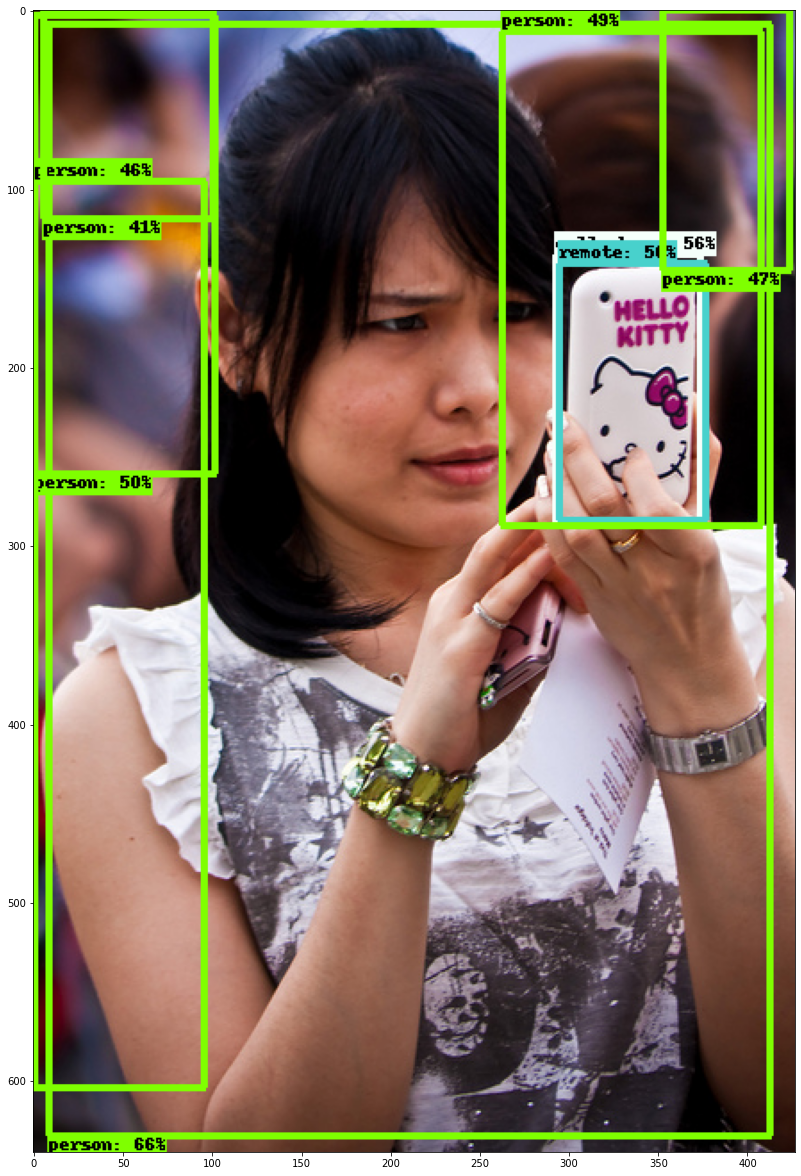

In [19]:
#PRED ONE IMAGE Works at least
# The input tensor is a tf.uint8 tensor with shape [1, height, width, 3] with values in [0, 255]
elapsed = []
start_time = time.time()

image = Image.open('/content/val2017/000000001296.jpg')
image_np = load_image_into_numpy_array('/content/val2017/000000001296.jpg')
input_tensor = np.expand_dims(image_np, 0)
preds = detector(input_tensor)

end_time = time.time()
elapsed.append(end_time - start_time)
boxes= preds['detection_boxes']
scores=preds['detection_scores']
classes = preds["detection_classes"]

plt.rcParams['figure.figsize'] = [42, 21]
label_id_offset = 1
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        boxes[0].numpy(),
        classes[0].numpy().astype(np.int32),
        scores[0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)

plt.imshow(image_np_with_detections)
mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')

In [ ]:
#IMAGES THAT CAUSE ERRORS TEST SET
#os.remove('/content/test2017/000000358089.jpg')
#os.remove('/content/test2017/000000048526.jpg')

Setting up the interpreters for the quantized models 

In [113]:
interpreter = tf.lite.Interpreter(model_path=str('/content/mnist_model_quant_f16.tflite'))
interpreter.resize_tensor_input(input_details[0]['index'], (1, input_tensor.shape[1], input_tensor.shape[2], 3))
interpreter.resize_tensor_input(output_details[0]['index'], (1, 5))
interpreter.allocate_tensors()

In [114]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [115]:
#USE ISLICE TO SELECT A LIMITED NR OF IMAGES (1000)
# INFERENCE ON X IMAGES
# UNCOMMENT FOR ORIGINAL MODEL, THIS IS FOR QUANTIZED MODELS 
from itertools import islice
import statistics
MAP=0
x = 100
#limited_files = islice(glob.iglob('/content/test2017/*.jpg'), 100)
i=1
for image_path in glob.iglob('/content/val2017/*.jpg'):
    i=i+1
    elapsed = []
    start_time = time.time()

    image_np = load_image_into_numpy_array(image_path)
    input_tensor = np.expand_dims(image_np, 0)
    
    interpreter.resize_tensor_input(input_details[0]['index'], (1, input_tensor.shape[1], input_tensor.shape[2], 3))
    interpreter.resize_tensor_input(output_details[0]['index'], (1, 5))
  
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]
    
    interpreter.allocate_tensors()
    interpreter.set_tensor(input_index, input_tensor)
    interpreter.invoke()
    mean = 0
    predictions = interpreter.get_tensor(output_index)
    

    mean = mean/predictions[0].shape[0]
    

    #preds = detector(input_tensor)
    end_time = time.time()

    elapsed.append(end_time - start_time)
    #boxes= preds['detection_boxes']
    #scores=preds['detection_scores']
    #classes = preds["detection_classes"]
    #The mean of accuracies for all classes on image
    #mean = statistics.mean(scores[0].numpy())

    mean2=mean.mean()
    #Aggregate the accuracy to the overall MAP
    MAP= MAP+mean2
    if(i>=1000):
      break;

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')

print('Overall Precision of 1000 iteration ' +  str(MAP))

Elapsed time: 0.5349986553192139 second per image
Overall Precision of 1000 iteration 0.23464616617002274


NOW  CONVERT TO TENSORFLOW LITE AND THEN QUANTIZE 

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(detector)
tflite_model = converter.convert()



In [24]:
converter2 = tf.lite.TFLiteConverter.from_keras_model(detector)
converter2.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model2 = converter.convert()


In [41]:
!sudo apt -y install libportaudio2
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools
!pip install -q opencv-python-headless==4.1.2.30
!pip uninstall -y tensorflow && pip install -q tensorflow==2.8.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
     |████████████████████████████████| 21.8 MB 6.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires tf-models-official>=2.5.1, but you have tf-models-official 2.3.0 which is incompatible.
Found existing installation: tensorflow 2.8.4
Uninstalling tensorflow-2.8.4:
  Successfully uninstalled tensorflow-2.8.4
     |████████████████████████████████| 668.3 MB 14 kB/s 
     |████████████████████████████████| 462 kB 7.7 MB/s 
ERROR: pip's dependency resolver does not currently take i

In [15]:
image_np2='/content/test2017/000000422619.jpg'

In [46]:
!pip3 install https://dl.google.com/coral/python/tflite_runtime-2.1.0.post1-cp36-cp36m-linux_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: tflite_runtime-2.1.0.post1-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


In [64]:
#evaluate.tflite()

SAVE TO FILE

In [16]:
tflite_models_dir = pathlib.Path("/content")
tflite_model_file = tflite_models_dir/"litemodel.tflite"
tflite_model_file.write_bytes(tflite_model)
# ORIGINAL MODEL HAS APPROX 24 MB 

24942224

## Dynamic Quantization (8 Bit precision)

In [17]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"litemodel_quantint.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)


7103072

In [20]:
input_details = interpreter.get_input_details()
print(input_details)
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'serving_default_input_tensor:0', 'index': 0, 'shape': array([1, 1, 1, 3], dtype=int32), 'shape_signature': array([ 1, -1, -1,  3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:6', 'index': 399, 'shape': array([   1, 1917,    4], dtype=int32), 'shape_signature': array([   1, 1917,    4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:0', 'index': 2147, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([ 1, -1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dt

In [109]:
interpreter = tf.lite.Interpreter(model_path=str('/content/mnist_model_quant_f16.tflite'))
interpreter.resize_tensor_input(input_details[0]['index'], (1, 640, 427, 3))
#interpreter.resize_tensor_input(output_details[0]['index'], (1, 5))
interpreter.allocate_tensors()



In [110]:
image = Image.open('/content/val2017/000000001296.jpg')
image_np = load_image_into_numpy_array('/content/val2017/000000001296.jpg')
input_tensor = np.expand_dims(image_np, 0)

In [111]:
input_tensor.shape

(1, 640, 427, 3)

In [1]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]
#interpreter.resize_tensor_input(input_details[0]['index'], (1, 640, 480, 3))
print(output_index)
interpreter.set_tensor(input_index, input_tensor)
interpreter.invoke()


predictions = interpreter.get_tensor(output_index)
output = interpreter.get_tensor(output_index)[0]
print('wtf')
print(output.argmax())

#predictions = run_tflite_model(tflite_file, [test_image_index])
predict=str(predictions[0])
print(predict)

mean = 0
print(predictions[0].shape[1])
fin = predictions[0].shape[0]
for i in range(1,fin):
  if(predictions[0][i][3]<0.7):
    if(predictions[0][i][3]>0.1):
      mean = mean + predictions[0][i][3]

mean = mean/predictions[0].shape[0]
print(mean)
 #fin = predictions[0].shape[0]
    #for i in range(1,fin):
    #  if(predictions[0][i][3]<0.7):
    #    if(predictions[0][i][3]>0.1):
    #      mean = mean + predictions[0][i][3]

print(predictions[0][1500][3])

NameError: ignored

In [36]:
output = interpreter.get_output_details()[0]
print(output)

{'name': 'StatefulPartitionedCall:6', 'index': 399, 'shape': array([   1, 1917,    4], dtype=int32), 'shape_signature': array([   1, 1917,    4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [30]:
print(predictions[0])

[[ 8.5603818e-04 -4.7612600e-03  5.8669344e-02  7.0511833e-02]
 [-4.1677766e-03 -5.0023407e-02  9.4620034e-02  1.8075427e-01]
 [-4.5721963e-02 -2.3103181e-02  1.6893396e-01  8.9870602e-02]
 ...
 [ 1.6155842e-01 -3.0537307e-02  8.3227062e-01  1.0292809e+00]
 [-5.3632855e-03  1.7436412e-01  1.0116940e+00  8.3302796e-01]
 [ 5.2036643e-03  2.1433353e-02  9.9226511e-01  9.8549962e-01]]


## Quantization 16 bit precision


In [108]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

#Finally, convert the model like usual. Note, by default the converted model will still use float input and outputs for invocation convenience.

tflite_fp16_model = converter.convert()
tflite_model_fp16_file = tflite_models_dir/"mnist_model_quant_f16.tflite"
tflite_model_fp16_file.write_bytes(tflite_fp16_model)


12857228

In [ ]:
print(input_tensor.shape) 
print(input_details)

(1, 480, 640, 3)
[{'name': 'serving_default_input_tensor:0', 'index': 0, 'shape': array([1, 1, 1, 3], dtype=int32), 'shape_signature': array([ 1, -1, -1,  3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
input_shape = input_details[0]['shape']
print(input_shape)
input_data = np.array(np.random.random_sample(input_shape), dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
predictions = interpreter.get_tensor(output_index)
print(predictions)

[1 1 1 3]
[[[-0.00726509  0.00309603  0.04068144  0.04850711]
  [-0.00623075 -0.06688023  0.06461991  0.16218068]
  [-0.05649067 -0.027687    0.16811278  0.09141371]
  ...
  [ 0.17678443  0.00602919  0.8374969   0.9941327 ]
  [ 0.00257871  0.19696915  0.9966123   0.82016194]
  [ 0.01651552  0.01717174  0.9894881   0.9912263 ]]]
